In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# read data from a CSV file
df = pd.read_csv('Production_Crops_Livestock_E_All_Data.csv', encoding='ISO-8859-1')
df


,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,NaN,...,19793.00,A,20053.00,A,29203.00,A,22134.00,A,21685.00,I
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5419,Yield,hg/ha,NaN,...,13788.00,A,17161.00,A,13083.00,A,17759.00,A,18748.00,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,tonnes,NaN,...,27291.00,A,34413.00,A,38205.00,A,39307.00,A,40655.23,I
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,ha,NaN,...,26160.00,I,25220.00,E,27387.00,I,26255.00,E,26287.00,E
4,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5419,Yield,hg/ha,NaN,...,6970.00,E,7866.00,E,6902.00,E,7409.00,E,7379.00,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79292,5817,'902,Net Food Importing Developing Countries,1729,'F1729,"Treenuts, Total",5419,Yield,hg/ha,6118.0,...,5927.00,E,5338.00,E,5346.00,E,5426.00,E,5515.00,E
79293,5817,'902,Net Food Importing Developing Countries,1729,'F1729,"Treenuts, Total",5510,Production,tonnes,255724.0,...,2299639.12,E,2495666.54,E,2314274.21,E,2479586.92,E,2498539.75,E
79294,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5312,Area harvested,ha,1877800.0,...,7217374.00,E,7429029.00,E,7543355.00,E,7710160.00,E,7978161.00,E
79295,5817,'902,Net Food Importing Developing Countries,1735,'F1735,Vegetables Primary,5419,Yield,hg/ha,66297.0,...,116623.00,E,116194.00,E,117830.00,E,117831.00,E,117360.00,E


In [3]:

# Cleaning the data (choose only five years to analyse the data)
# extract rows that include data for maize (corn), rice, wheat, barley, and sorghum

columns_to_extract = ['Item','Element','Area', 'Y2000', 'Y2005', 'Y2010', 'Y2015', 'Y2020']

# Create a new dataframe with the selected years
df_new = df[columns_to_extract]
# Create a new dataframe with the selected years and only production values shown
df_chart = pd.DataFrame(columns=['Item','Element','Area', 'Y2000', 'Y2005', 'Y2010', 'Y2015', 'Y2020'])
for index, row in df.iterrows():


 crop = row['Item']
 if crop in ['Maize (corn)', 'Rice', 'Wheat', 'Barley', 'Sorghum']and row['Element'] == 'Production':
        #print(index,row['Item'],row['Area'],row['Element'],row['Y2005'])
         df_chart.loc[index] = [row['Item'], row['Element'], row['Area'], row['Y2000'], row['Y2005'], row['Y2010'], row['Y2015'], row['Y2020']]
        
      
#print(df_chart)
print(df_chart.columns)

Index(['Item', 'Element', 'Area', 'Y2000', 'Y2005', 'Y2010', 'Y2015', 'Y2020'], dtype='object')


In [4]:

# Extract the worlwide production values
# Extract the data for Maize, Rice, Wheat, Barley, and Sorghum
df_crops = df[(df['Item'].isin(['Maize (corn)', 'Rice', 'Wheat', 'Barley', 'Sorghum'])) & (df['Element'] == 'Production')]

# Group the dataframe by crop and year, and then sum the values for each group
df_sum = df_crops.groupby(['Item'])[['Y2000', 'Y2005', 'Y2010', 'Y2015', 'Y2020']].sum()

# Print the result
print(df_sum)
print(df_sum.columns)










                     Y2000         Y2005         Y2010         Y2015  \
Item                                                                   
Barley        5.917651e+08  6.147988e+08  5.621447e+08  6.736593e+08   
Maize (corn)  2.632245e+09  3.192467e+09  3.842675e+09  4.769702e+09   
Rice          2.984591e+09  3.168811e+09  3.501518e+09  3.699342e+09   
Sorghum       2.684730e+08  2.995830e+08  3.133303e+08  3.395023e+08   
Wheat         2.724245e+09  2.907134e+09  2.997627e+09  3.469615e+09   

                     Y2020  
Item                        
Barley        7.100669e+08  
Maize (corn)  5.263329e+09  
Rice          3.903665e+09  
Sorghum       3.192200e+08  
Wheat         3.533445e+09  
Index(['Y2000', 'Y2005', 'Y2010', 'Y2015', 'Y2020'], dtype='object')


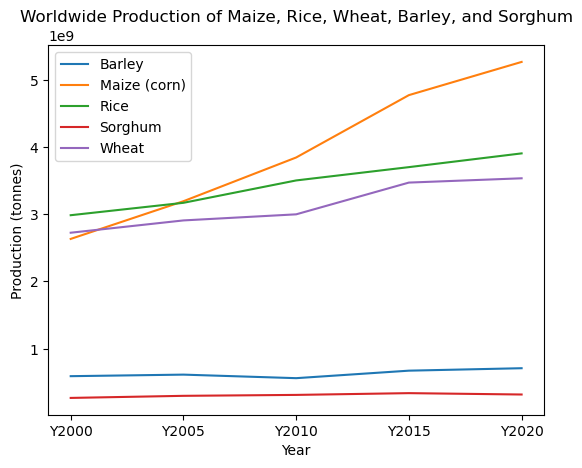

In [6]:
import matplotlib.pyplot as plt

# Transpose the dataframe so that years become rows and crops become columns
df_transposed = df_sum.T

# Plot a line chart for each crop
for crop in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[crop], label=crop)

# Set the title, x-axis label, and y-axis label
plt.title('Worldwide Production of Maize, Rice, Wheat, Barley, and Sorghum')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')

# Add a legend and show the chart
plt.legend()
plt.show()

In [20]:
df_chart
print(df_chart.columns)

Index(['Item', 'Element', 'Area', 'Y2000', 'Y2005', 'Y2010', 'Y2015', 'Y2020'], dtype='object')


In [5]:
#Remove the column that are unwanted (Remove regions)
dg = pd.read_csv('Production_Crops_Livestock_E_All_Data.csv', encoding='ISO-8859-1', skiprows=0, nrows=61273)
print(dg)

       Area Code Area Code (M49)         Area  Item Code Item Code (CPC)  \
0              2            '004  Afghanistan        221          '01371   
1              2            '004  Afghanistan        221          '01371   
2              2            '004  Afghanistan        221          '01371   
3              2            '004  Afghanistan        711          '01654   
4              2            '004  Afghanistan        711          '01654   
...          ...             ...          ...        ...             ...   
61268        181            '716     Zimbabwe       1729          'F1729   
61269        181            '716     Zimbabwe       1729          'F1729   
61270        181            '716     Zimbabwe       1729          'F1729   
61271        181            '716     Zimbabwe       1735          'F1735   
61272        181            '716     Zimbabwe       1735          'F1735   

                                                    Item  Element Code  \
0            

In [12]:


dg_crops = dg[(dg['Item'].isin(['Maize (corn)', 'Rice', 'Wheat', 'Barley', 'Sorghum'])) & (dg['Element'] == 'Production')]
#print(dg_crops)
print("here",dg_crops.columns)
#2021
# Group the dataframe by crop and year, and then sum the values for each group

dg_sumlargest = dg_crops.groupby(['Item', 'Area'])[['Y2020']].sum().reset_index()

#print(dg_sumlargest )
print("here",dg_sumlargest.columns)

# Print the result
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#dg_sumlargest

dg_largest = dg_sumlargest.groupby('Item').apply(lambda x: x.nlargest(3, 'Y2020')).reset_index(level=0, drop=True)
#print(dg_largest)
#(dg_largest.columns)
#print(dg_largest)
# Create a list of all countries in the original dataset
all_countries = dg_sumlargest['Area'].unique()
# For each crop, get the countries that were not selected as the top 4
# For each crop, get the countries that were not selected as the top 4 and sum their values
dg_other = pd.DataFrame()
for crop in dg_largest['Item'].unique():
    top_countries = dg_largest[dg_largest['Item'] == crop]['Area'].unique()
    other_countries = list(set(all_countries) - set(top_countries))
    dg_other_crop = dg_sumlargest[(dg_sumlargest['Item'] == crop) & (dg_sumlargest['Area'].isin(other_countries))]
    other_sum = dg_other_crop['Y2020'].sum()
    dg_other_crop = dg_other_crop.iloc[:1, :]
    dg_other_crop['Area'] = 'Other'
    dg_other_crop['Y2020'] = other_sum
    dg_other = dg_other.append(dg_other_crop)
print (dg_other)

here Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y1961',
       ...
       'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019', 'Y2019F', 'Y2020',
       'Y2020F', 'Y2021', 'Y2021F'],
      dtype='object', length=131)
here Index(['Item', 'Area', 'Y2020'], dtype='object')
             Item   Area         Y2020
0          Barley  Other  1.165695e+08
115  Maize (corn)  Other  5.438802e+08
298          Rice  Other  3.708680e+08
447       Sorghum  Other  4.077117e+07
584         Wheat  Other  5.148391e+08


C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\4128776837.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\4128776837.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\4128776837.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\4128776837.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\L

C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\168488146.py:25: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for country, value in row.iteritems():


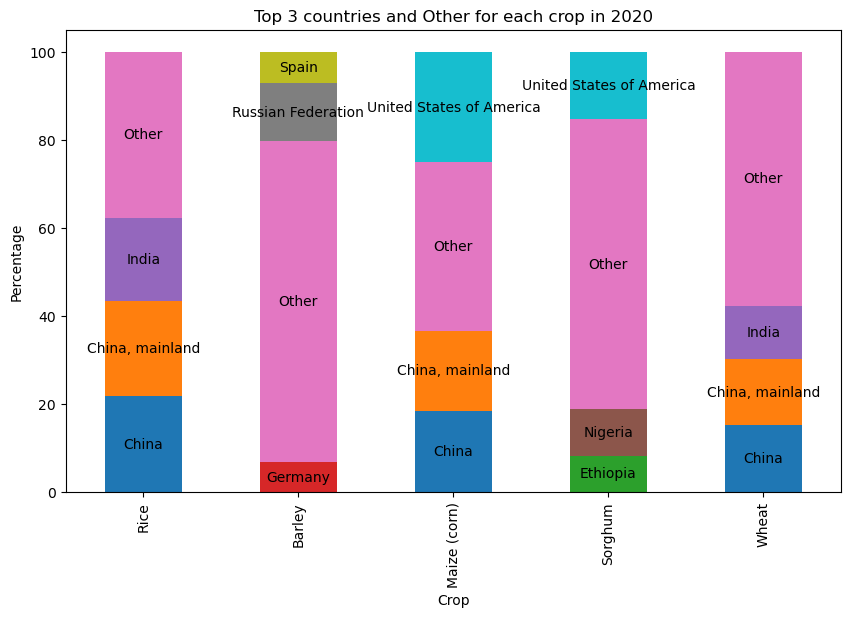

In [13]:
import matplotlib.pyplot as plt

# Create a new dataframe with top 4 countries and "Other" for each crop
dg_plot = pd.concat([dg_largest, dg_other])

# Pivot the dataframe to have crops as rows and countries as columns
dg_plot = dg_plot.pivot(index='Item', columns='Area', values='Y2020').fillna(0)

# Convert the values to percentages
dg_plot = dg_plot.apply(lambda x: x/x.sum()*100, axis=1)

# Sort the rows by total value (sum of top 4 countries and "Other")
dg_plot = dg_plot.loc[dg_plot.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar chart
ax = dg_plot.plot(kind='bar', stacked=True, figsize=(10, 6),legend=None)
plt.xlabel('Crop')
plt.ylabel('Percentage')
plt.title('Top 3 countries and Other for each crop in 2020')
#plt.legend(title='Country', loc='upper left')

# Add country labels inside the bars
for i, (crop, row) in enumerate(dg_plot.iterrows()):
    offset = 0
    for country, value in row.iteritems():
        if value != 0:
            ax.text(i, offset + value/2, country, ha='center', va='center')
            offset += value

plt.show()

In [9]:
#2015
dg_crops = dg[(dg['Item'].isin(['Maize (corn)', 'Rice', 'Wheat', 'Barley', 'Sorghum'])) & (dg['Element'] == 'Production')]
#print(dg_crops)
print("here",dg_crops.columns)
#2021
# Group the dataframe by crop and year, and then sum the values for each group

dg_sumlargest = dg_crops.groupby(['Item', 'Area'])[['Y2015']].sum().reset_index()

#print(dg_sumlargest )
print("here",dg_sumlargest.columns)

# Print the result
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#dg_sumlargest

dg_largest = dg_sumlargest.groupby('Item').apply(lambda x: x.nlargest(3, 'Y2015')).reset_index(level=0, drop=True)
#print(dg_largest)
#(dg_largest.columns)
#print(dg_largest)
# Create a list of all countries in the original dataset
all_countries = dg_sumlargest['Area'].unique()
# For each crop, get the countries that were not selected as the top 4
# For each crop, get the countries that were not selected as the top 4 and sum their values
dg_other = pd.DataFrame()
for crop in dg_largest['Item'].unique():
    top_countries = dg_largest[dg_largest['Item'] == crop]['Area'].unique()
    other_countries = list(set(all_countries) - set(top_countries))
    dg_other_crop = dg_sumlargest[(dg_sumlargest['Item'] == crop) & (dg_sumlargest['Area'].isin(other_countries))]
    other_sum = dg_other_crop['Y2015'].sum()
    dg_other_crop = dg_other_crop.iloc[:1, :]
    dg_other_crop['Area'] = 'Other'
    dg_other_crop['Y2015'] = other_sum
    dg_other = dg_other.append(dg_other_crop)
print (dg_other)


here Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y1961',
       ...
       'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019', 'Y2019F', 'Y2020',
       'Y2020F', 'Y2021', 'Y2021F'],
      dtype='object', length=131)
here Index(['Item', 'Area', 'Y2015'], dtype='object')
             Item   Area         Y2015
0          Barley  Other  1.079642e+08
115  Maize (corn)  Other  4.434127e+08
298          Rice  Other  3.642164e+08
447       Sorghum  Other  4.108088e+07
584         Wheat  Other  5.226763e+08


C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\3739373975.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\3739373975.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\3739373975.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\3739373975.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\L

C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\3808202984.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for country, value in row.iteritems():


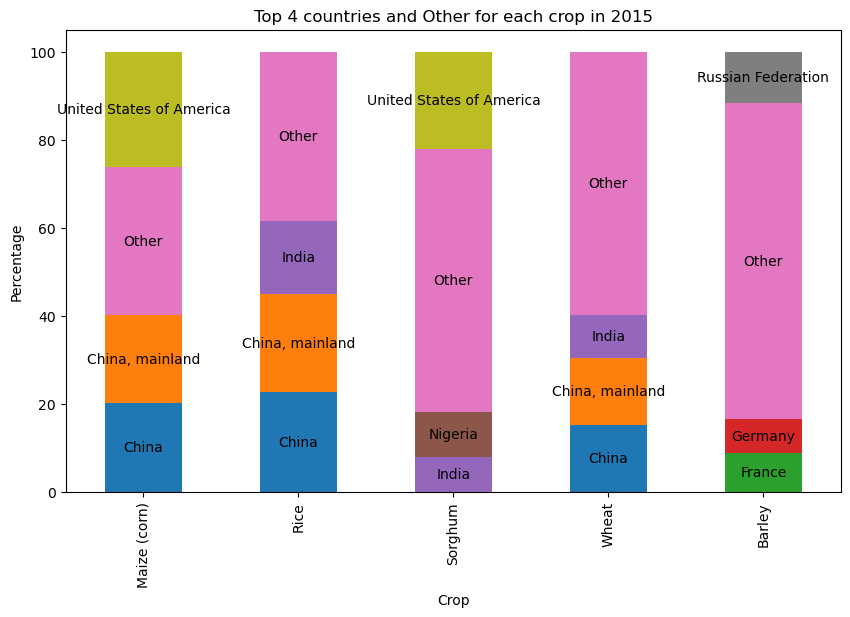

In [10]:
#2015
import matplotlib.pyplot as plt

# Create a new dataframe with top 4 countries and "Other" for each crop
dg_plot = pd.concat([dg_largest, dg_other])

# Pivot the dataframe to have crops as rows and countries as columns
dg_plot = dg_plot.pivot(index='Item', columns='Area', values='Y2015').fillna(0)

# Convert the values to percentages
dg_plot = dg_plot.apply(lambda x: x/x.sum()*100, axis=1)

# Sort the rows by total value (sum of top 4 countries and "Other")
dg_plot = dg_plot.loc[dg_plot.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar chart
ax = dg_plot.plot(kind='bar', stacked=True, figsize=(10, 6),legend=None)
plt.xlabel('Crop')
plt.ylabel('Percentage')
plt.title('Top 3 countries and Other for each crop in 2015')
#plt.legend(title='Country', loc='upper left')

# Add country labels inside the bars
for i, (crop, row) in enumerate(dg_plot.iterrows()):
    offset = 0
    for country, value in row.iteritems():
        if value != 0:
            ax.text(i, offset + value/2, country, ha='center', va='center')
            offset += value

plt.show()

In [17]:
#2010
dg_crops = dg[(dg['Item'].isin(['Maize (corn)', 'Rice', 'Wheat', 'Barley', 'Sorghum'])) & (dg['Element'] == 'Production')]
#print(dg_crops)
print("here",dg_crops.columns)
#2021
# Group the dataframe by crop and year, and then sum the values for each group

dg_sumlargest = dg_crops.groupby(['Item', 'Area'])[['Y2010']].sum().reset_index()

#print(dg_sumlargest )
print("here",dg_sumlargest.columns)

# Print the result
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#dg_sumlargest

dg_largest = dg_sumlargest.groupby('Item').apply(lambda x: x.nlargest(3, 'Y2010')).reset_index(level=0, drop=True)
#print(dg_largest)
#(dg_largest.columns)
#print(dg_largest)
# Create a list of all countries in the original dataset
all_countries = dg_sumlargest['Area'].unique()
# For each crop, get the countries that were not selected as the top 4
# For each crop, get the countries that were not selected as the top 4 and sum their values
dg_other = pd.DataFrame()
for crop in dg_largest['Item'].unique():
    top_countries = dg_largest[dg_largest['Item'] == crop]['Area'].unique()
    other_countries = list(set(all_countries) - set(top_countries))
    dg_other_crop = dg_sumlargest[(dg_sumlargest['Item'] == crop) & (dg_sumlargest['Area'].isin(other_countries))]
    other_sum = dg_other_crop['Y2010'].sum()
    dg_other_crop = dg_other_crop.iloc[:1, :]
    dg_other_crop['Area'] = 'Other'
    dg_other_crop['Y2010'] = other_sum
    dg_other = dg_other.append(dg_other_crop)
print (dg_other)


here Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y1961',
       ...
       'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019', 'Y2019F', 'Y2020',
       'Y2020F', 'Y2021', 'Y2021F'],
      dtype='object', length=131)
here Index(['Item', 'Area', 'Y2010'], dtype='object')
             Item   Area         Y2010
0          Barley  Other  9.651961e+07
115  Maize (corn)  Other  3.597149e+08
298          Rice  Other  3.547479e+08
447       Sorghum  Other  3.978541e+07
584         Wheat  Other  4.448189e+08


C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\947446129.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\947446129.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\947446129.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\947446129.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local

C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\1661569221.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for country, value in row.iteritems():


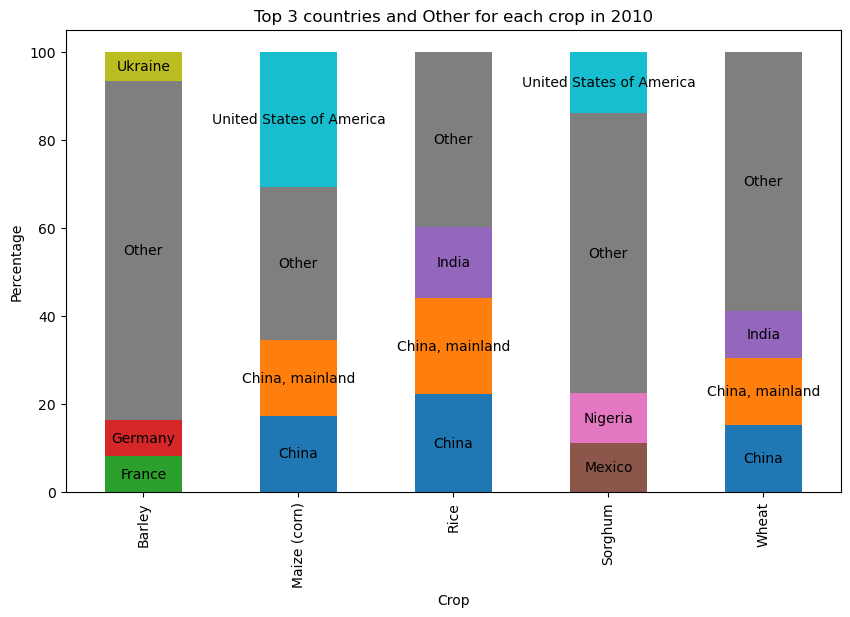

In [18]:
#2010
import matplotlib.pyplot as plt

# Create a new dataframe with top 4 countries and "Other" for each crop
dg_plot = pd.concat([dg_largest, dg_other])

# Pivot the dataframe to have crops as rows and countries as columns
dg_plot = dg_plot.pivot(index='Item', columns='Area', values='Y2010').fillna(0)

# Convert the values to percentages
dg_plot = dg_plot.apply(lambda x: x/x.sum()*100, axis=1)

# Sort the rows by total value (sum of top 4 countries and "Other")
dg_plot = dg_plot.loc[dg_plot.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar chart
ax = dg_plot.plot(kind='bar', stacked=True, figsize=(10, 6),legend=None)
plt.xlabel('Crop')
plt.ylabel('Percentage')
plt.title('Top 3 countries and Other for each crop in 2010')
#plt.legend(title='Country', loc='upper left')

# Add country labels inside the bars
for i, (crop, row) in enumerate(dg_plot.iterrows()):
    offset = 0
    for country, value in row.iteritems():
        if value != 0:
            ax.text(i, offset + value/2, country, ha='center', va='center')
            offset += value

plt.show()

In [19]:
#2005
dg_crops = dg[(dg['Item'].isin(['Maize (corn)', 'Rice', 'Wheat', 'Barley', 'Sorghum'])) & (dg['Element'] == 'Production')]
#print(dg_crops)
print("here",dg_crops.columns)
#2021
# Group the dataframe by crop and year, and then sum the values for each group

dg_sumlargest = dg_crops.groupby(['Item', 'Area'])[['Y2005']].sum().reset_index()

#print(dg_sumlargest )
print("here",dg_sumlargest.columns)

# Print the result
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#dg_sumlargest

dg_largest = dg_sumlargest.groupby('Item').apply(lambda x: x.nlargest(3, 'Y2005')).reset_index(level=0, drop=True)
#print(dg_largest)
#(dg_largest.columns)
#print(dg_largest)
# Create a list of all countries in the original dataset
all_countries = dg_sumlargest['Area'].unique()
# For each crop, get the countries that were not selected as the top 4
# For each crop, get the countries that were not selected as the top 4 and sum their values
dg_other = pd.DataFrame()
for crop in dg_largest['Item'].unique():
    top_countries = dg_largest[dg_largest['Item'] == crop]['Area'].unique()
    other_countries = list(set(all_countries) - set(top_countries))
    dg_other_crop = dg_sumlargest[(dg_sumlargest['Item'] == crop) & (dg_sumlargest['Area'].isin(other_countries))]
    other_sum = dg_other_crop['Y2005'].sum()
    dg_other_crop = dg_other_crop.iloc[:1, :]
    dg_other_crop['Area'] = 'Other'
    dg_other_crop['Y2005'] = other_sum
    dg_other = dg_other.append(dg_other_crop)
print (dg_other)

here Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y1961',
       ...
       'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019', 'Y2019F', 'Y2020',
       'Y2020F', 'Y2021', 'Y2021F'],
      dtype='object', length=131)
here Index(['Item', 'Area', 'Y2005'], dtype='object')
             Item   Area         Y2005
0          Barley  Other  1.012049e+08
115  Maize (corn)  Other  2.925327e+08
298          Rice  Other  3.159474e+08
447       Sorghum  Other  3.571365e+07
584         Wheat  Other  4.609389e+08


C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2643577144.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2643577144.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2643577144.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2643577144.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\L

C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2487496225.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for country, value in row.iteritems():


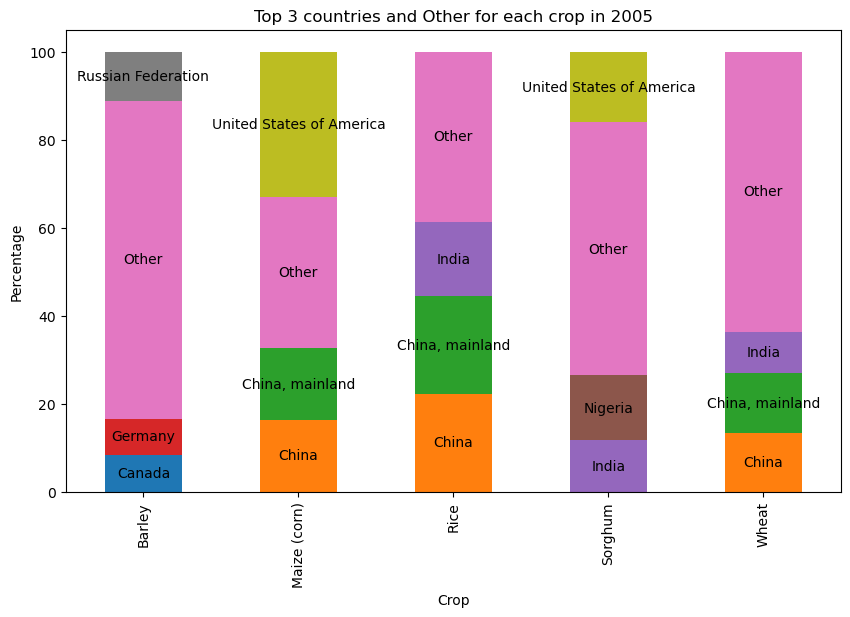

In [20]:

#2005
import matplotlib.pyplot as plt

# Create a new dataframe with top 4 countries and "Other" for each crop
dg_plot = pd.concat([dg_largest, dg_other])

# Pivot the dataframe to have crops as rows and countries as columns
dg_plot = dg_plot.pivot(index='Item', columns='Area', values='Y2005').fillna(0)

# Convert the values to percentages
dg_plot = dg_plot.apply(lambda x: x/x.sum()*100, axis=1)

# Sort the rows by total value (sum of top 4 countries and "Other")
dg_plot = dg_plot.loc[dg_plot.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar chart
ax = dg_plot.plot(kind='bar', stacked=True, figsize=(10, 6),legend=None)
plt.xlabel('Crop')
plt.ylabel('Percentage')
plt.title('Top 3 countries and Other for each crop in 2005')
#plt.legend(title='Country', loc='upper left')

# Add country labels inside the bars
for i, (crop, row) in enumerate(dg_plot.iterrows()):
    offset = 0
    for country, value in row.iteritems():
        if value != 0:
            ax.text(i, offset + value/2, country, ha='center', va='center')
            offset += value

plt.show()

In [21]:
#2000
dg_crops = dg[(dg['Item'].isin(['Maize (corn)', 'Rice', 'Wheat', 'Barley', 'Sorghum'])) & (dg['Element'] == 'Production')]
#print(dg_crops)
print("here",dg_crops.columns)
#2021
# Group the dataframe by crop and year, and then sum the values for each group

dg_sumlargest = dg_crops.groupby(['Item', 'Area'])[['Y2000']].sum().reset_index()

#print(dg_sumlargest )
print("here",dg_sumlargest.columns)

# Print the result
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#dg_sumlargest

dg_largest = dg_sumlargest.groupby('Item').apply(lambda x: x.nlargest(3, 'Y2000')).reset_index(level=0, drop=True)
#print(dg_largest)
#(dg_largest.columns)
#print(dg_largest)
# Create a list of all countries in the original dataset
all_countries = dg_sumlargest['Area'].unique()
# For each crop, get the countries that were not selected as the top 4
# For each crop, get the countries that were not selected as the top 4 and sum their values
dg_other = pd.DataFrame()
for crop in dg_largest['Item'].unique():
    top_countries = dg_largest[dg_largest['Item'] == crop]['Area'].unique()
    other_countries = list(set(all_countries) - set(top_countries))
    dg_other_crop = dg_sumlargest[(dg_sumlargest['Item'] == crop) & (dg_sumlargest['Area'].isin(other_countries))]
    other_sum = dg_other_crop['Y2000'].sum()
    dg_other_crop = dg_other_crop.iloc[:1, :]
    dg_other_crop['Area'] = 'Other'
    dg_other_crop['Y2000'] = other_sum
    dg_other = dg_other.append(dg_other_crop)
print (dg_other)

here Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y1961',
       ...
       'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019', 'Y2019F', 'Y2020',
       'Y2020F', 'Y2021', 'Y2021F'],
      dtype='object', length=131)
here Index(['Item', 'Area', 'Y2000'], dtype='object')
             Item   Area         Y2000
0          Barley  Other  9.467851e+07
115  Maize (corn)  Other  2.341659e+08
298          Rice  Other  2.832952e+08
447       Sorghum  Other  3.123710e+07
584         Wheat  Other  4.116433e+08


C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2297964006.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2297964006.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2297964006.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2297964006.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\L

C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\384798836.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for country, value in row.iteritems():


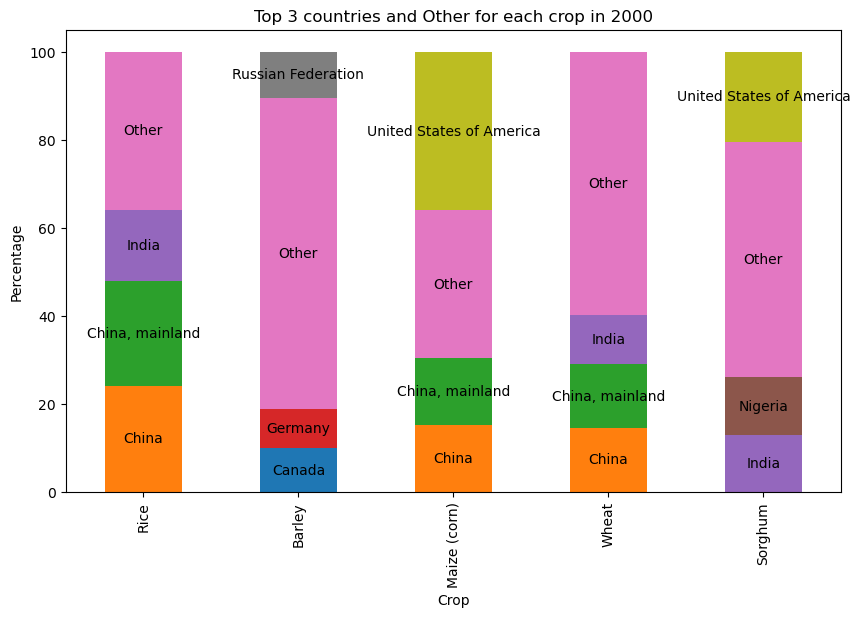

In [23]:
#2000
import matplotlib.pyplot as plt

# Create a new dataframe with top 4 countries and "Other" for each crop
dg_plot = pd.concat([dg_largest, dg_other])

# Pivot the dataframe to have crops as rows and countries as columns
dg_plot = dg_plot.pivot(index='Item', columns='Area', values='Y2000').fillna(0)

# Convert the values to percentages
dg_plot = dg_plot.apply(lambda x: x/x.sum()*100, axis=1)

# Sort the rows by total value (sum of top 4 countries and "Other")
dg_plot = dg_plot.loc[dg_plot.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar chart
ax = dg_plot.plot(kind='bar', stacked=True, figsize=(10, 6),legend=None)
plt.xlabel('Crop')
plt.ylabel('Percentage')
plt.title('Top 3 countries and Other for each crop in 2000')
#plt.legend(title='Country', loc='upper left')

# Add country labels inside the bars
for i, (crop, row) in enumerate(dg_plot.iterrows()):
    offset = 0
    for country, value in row.iteritems():
        if value != 0:
            ax.text(i, offset + value/2, country, ha='center', va='center')
            offset += value

plt.show()



In [24]:


#2021
# Group the dataframe by crop and year, and then sum the values for each group

dg_sumlargest = dg_crops.groupby(['Item', 'Area'])[['Y2021']].sum().reset_index()

#print(dg_sumlargest )
print("here",dg_sumlargest.columns)

# Print the result
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#dg_sumlargest

dg_largest = dg_sumlargest.groupby('Item').apply(lambda x: x.nlargest(3, 'Y2021')).reset_index(level=0, drop=True)
#print(dg_largest)
#(dg_largest.columns)
#print(dg_largest)
# Create a list of all countries in the original dataset
all_countries = dg_sumlargest['Area'].unique()
# For each crop, get the countries that were not selected as the top 4
# For each crop, get the countries that were not selected as the top 4 and sum their values
dg_other = pd.DataFrame()
for crop in dg_largest['Item'].unique():
    top_countries = dg_largest[dg_largest['Item'] == crop]['Area'].unique()
    other_countries = list(set(all_countries) - set(top_countries))
    dg_other_crop = dg_sumlargest[(dg_sumlargest['Item'] == crop) & (dg_sumlargest['Area'].isin(other_countries))]
    other_sum = dg_other_crop['Y2021'].sum()
    dg_other_crop = dg_other_crop.iloc[:1, :]
    dg_other_crop['Area'] = 'Other'
    dg_other_crop['Y2021'] = other_sum
    dg_other = dg_other.append(dg_other_crop)
print (dg_other)

here Index(['Item', 'Area', 'Y2021'], dtype='object')
             Item   Area         Y2021
0          Barley  Other  1.036581e+08
115  Maize (corn)  Other  5.537401e+08
298          Rice  Other  3.790259e+08
447       Sorghum  Other  4.145724e+07
584         Wheat  Other  5.243411e+08


C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\36458195.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\36458195.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\36458195.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\36458195.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dg_other = dg_other.append(dg_other_crop)
C:\Users\erraf\AppData\Local\Tem

C:\Users\erraf\AppData\Local\Temp\ipykernel_3084\2856215864.py:25: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for country, value in row.iteritems():


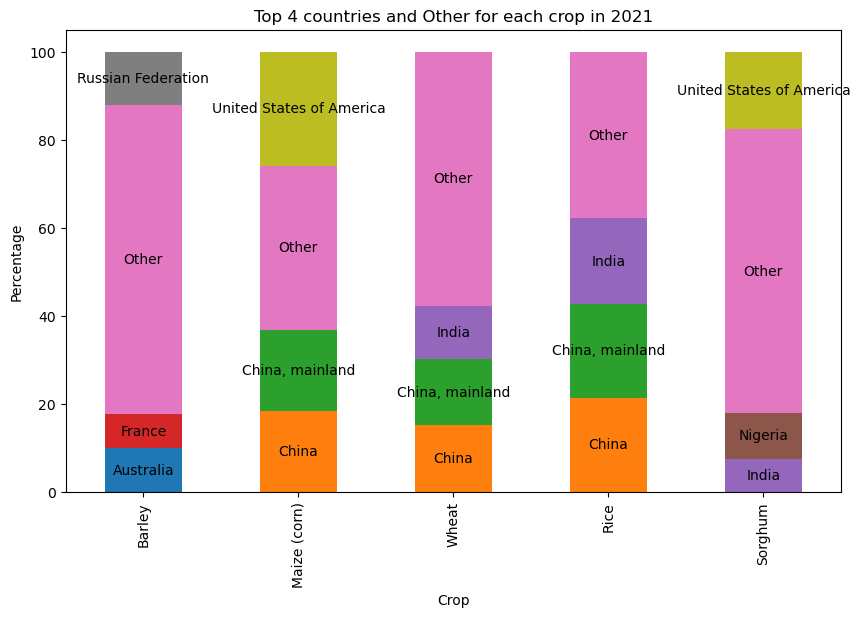

In [25]:
import matplotlib.pyplot as plt

# Create a new dataframe with top 4 countries and "Other" for each crop
dg_plot = pd.concat([dg_largest, dg_other])

# Pivot the dataframe to have crops as rows and countries as columns
dg_plot = dg_plot.pivot(index='Item', columns='Area', values='Y2021').fillna(0)

# Convert the values to percentages
dg_plot = dg_plot.apply(lambda x: x/x.sum()*100, axis=1)

# Sort the rows by total value (sum of top 4 countries and "Other")
dg_plot = dg_plot.loc[dg_plot.sum(axis=1).sort_values(ascending=False).index]

# Plot the stacked bar chart
ax = dg_plot.plot(kind='bar', stacked=True, figsize=(10, 6),legend=None)
plt.xlabel('Crop')
plt.ylabel('Percentage')
plt.title('Top 4 countries and Other for each crop in 2021')
#plt.legend(title='Country', loc='upper left')

# Add country labels inside the bars
for i, (crop, row) in enumerate(dg_plot.iterrows()):
    offset = 0
    for country, value in row.iteritems():
        if value != 0:
            ax.text(i, offset + value/2, country, ha='center', va='center')
            offset += value

plt.show()


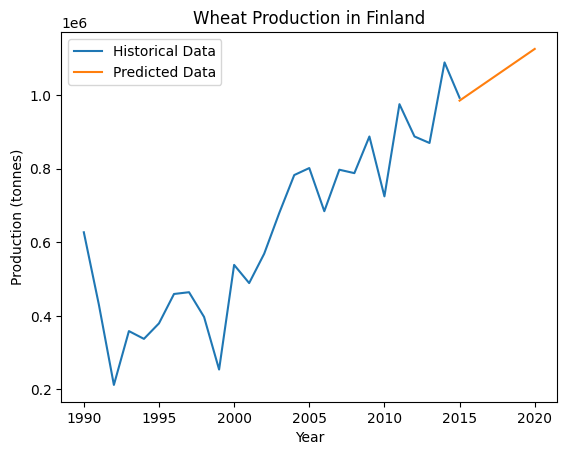

Production for 2015: 984464 tonnes
Production for 2016: 1012547 tonnes
Production for 2017: 1040629 tonnes
Production for 2018: 1068712 tonnes
Production for 2019: 1096794 tonnes
Production for 2020: 1124877 tonnes


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# read data from the CSV file
df = pd.read_csv('Production_Crops_Livestock_E_All_Data.csv', encoding='ISO-8859-1')

# extract only the rows for wheat production in Finland
df_corn = df.loc[(df['Item'] == 'Wheat') & (df['Element'] == 'Production') & (df['Area'] == 'Finland')]

# extract only the columns for the years we're interested in (1990-2015)
years = ['Y'+str(year) for year in list(range(1990, 2016))]
df_corn = df_corn[['Area'] + years]

# rename the year columns
df_corn.columns = ['Area'] + list(range(1990, 2016))

# pivot the data so that each row represents a country and each column represents a year
df_corn = df_corn.set_index('Area')
df_corn = df_corn.transpose()
df_corn.index.name = 'Year'

# fill missing values with 0
df_corn = df_corn.fillna(0)

# define the input data (years) and the output data (production)
X = df_corn.index.values.reshape(-1, 1)
y = df_corn.values

# create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# predict the production for the next 5 years
future_years = [year for year in range(2015, 2021)]
future_production = model.predict([[year] for year in future_years])

# plot the historical and predicted data
plt.plot(X, y, label='Historical Data')
plt.plot(future_years, future_production, label='Predicted Data')
plt.title('Wheat Production in Finland')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.legend()
plt.show()

# print the predicted production for each year
for year, production in zip(future_years, future_production):
    print(f"Production for {year}: {int(production[0])} tonnes")